 a new version of the code....

Adjust brightness and contrast. Press 's' to save and continue.


2025-04-23 14:55:56.505 python[17978:261548] +[IMKClient subclass]: chose IMKClient_Modern
2025-04-23 14:55:56.506 python[17978:261548] +[IMKInputSession subclass]: chose IMKInputSession_Modern


Draw a polygon by clicking. Press 'q' when done.


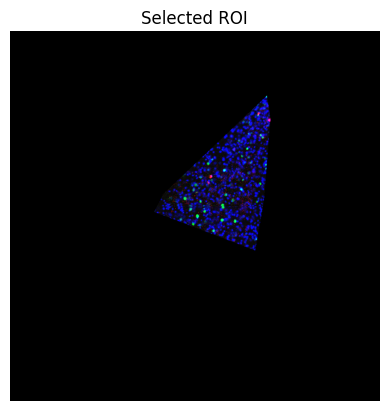

--- Detected Region Areas ---
Area: 1.0
Area: 1.0
Area: 33.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 48.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 4.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 2.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 2.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 2.0
Area: 51.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 2.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 25.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 2.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 2.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 1.0
Area: 

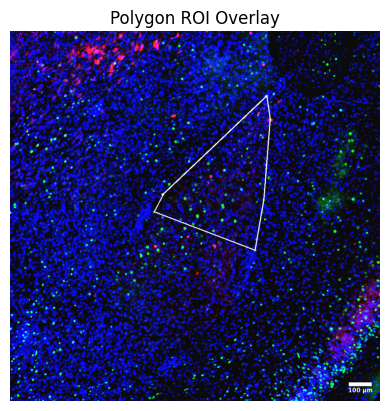

Results saved to 'polygon_roi_dot_counts.csv'


: 

In [ ]:
### Immunohistology Image Analysis Script with Brightness/Contrast Adjustment, Polygon ROI, and Dot Size Filtering with Area Feedback



# Import required Python libraries
import numpy as np  # For numerical operations
import matplotlib.pyplot as plt  # For displaying images and plots
import cv2  # OpenCV for image handling and GUI
import pandas as pd  # For saving results to CSV
from skimage import measure  # For image labeling and region properties

# Load the original image
image_path = '/Users/sungmo/Library/CloudStorage/Dropbox/K-BioX/study_ImageAnalysis/1_2_3.png'
original_image = cv2.imread(image_path)  # Load the image in BGR format
image = original_image.copy()  # Create a copy for processing
image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for visualization

# Define a dummy callback for trackbars
def nothing(x):
    pass

# Create OpenCV window and add trackbars to adjust brightness and contrast
cv2.namedWindow("Adjust Brightness/Contrast")
cv2.createTrackbar("Brightness", "Adjust Brightness/Contrast", 50, 100, nothing)  # Range from 0 to 100
cv2.createTrackbar("Contrast", "Adjust Brightness/Contrast", 50, 100, nothing)

print("Adjust brightness and contrast. Press 's' to save and continue.")

# Interactive loop for adjusting image appearance
while True:
    b = cv2.getTrackbarPos("Brightness", "Adjust Brightness/Contrast") - 50  # Convert to range -50 to +50
    c = cv2.getTrackbarPos("Contrast", "Adjust Brightness/Contrast") - 50

    # Adjust the image using contrast and brightness values
    adjusted = cv2.convertScaleAbs(original_image, alpha=1 + c / 50.0, beta=b)
    display_image = cv2.cvtColor(adjusted, cv2.COLOR_BGR2RGB)
    cv2.imshow("Adjust Brightness/Contrast", adjusted)

    if cv2.waitKey(1) & 0xFF == ord('s'):  # Press 's' to confirm and continue
        image = adjusted.copy()
        image_rgb = display_image.copy()
        break

cv2.destroyWindow("Adjust Brightness/Contrast")

# Initialize list for storing clicked polygon points
polygon_points = []

# Define mouse callback function to store points and draw the polygon outline
def draw_polygon(event, x, y, flags, param):
    global polygon_points
    if event == cv2.EVENT_LBUTTONDOWN:  # Left mouse click
        polygon_points.append((x, y))
        cv2.circle(image_rgb, (x, y), 3, (0, 255, 0), -1)  # Draw a green dot
        if len(polygon_points) > 1:
            cv2.line(image_rgb, polygon_points[-2], polygon_points[-1], (255, 255, 255), 1)  # Draw a line between points
        cv2.imshow("Draw Polygon - Press 'q' to Finish", cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))

# Create drawing window and register callback
cv2.namedWindow("Draw Polygon - Press 'q' to Finish")
cv2.setMouseCallback("Draw Polygon - Press 'q' to Finish", draw_polygon)

print("Draw a polygon by clicking. Press 'q' when done.")

# Keep displaying the window until user finishes ROI drawing
while True:
    cv2.imshow("Draw Polygon - Press 'q' to Finish", cv2.cvtColor(image_rgb, cv2.COLOR_RGB2BGR))
    if cv2.waitKey(1) & 0xFF == ord('q'):  # Press 'q' to finalize polygon
        break
cv2.destroyAllWindows()

# Validate that polygon has enough points
if len(polygon_points) < 3:
    raise ValueError("A polygon must have at least 3 points.")

# Create a mask for the polygon area
mask = np.zeros(image.shape[:2], dtype=np.uint8)  # Empty mask same size as image
pts = np.array(polygon_points, dtype=np.int32)  # Convert list to NumPy array
cv2.fillPoly(mask, [pts], 1)  # Fill the polygon in the mask with 1s

# Apply the mask to extract the region of interest (ROI)
roi = cv2.bitwise_and(image, image, mask=mask)  # Apply mask
roi_rgb = cv2.cvtColor(roi, cv2.COLOR_BGR2RGB)  # Convert ROI to RGB for display

# Show the selected ROI
plt.imshow(roi_rgb)
plt.title("Selected ROI")
plt.axis('off')
plt.show()

# Normalize image to 0–1 for processing
roi_float = roi.astype(float) / 255
mask_bool = mask.astype(bool)  # Boolean mask for filtering

# Minimum size (in pixels) to consider a dot as valid
min_dot_area = 20

# Function to count color-specific dots above a threshold and within area limit
def count_color_dots(channel, threshold):
    binary = (channel > threshold) & mask_bool  # Binary mask of pixels above threshold and within ROI
    labeled = measure.label(binary)  # Label connected regions
    props = measure.regionprops(labeled)  # Extract properties like area
    print("--- Detected Region Areas ---")
    for region in props:
        print(f"Area: {region.area}")  # Print area of each detected region
    valid_regions = [region for region in props if region.area >= min_dot_area]  # Filter by size
    return len(valid_regions)

# Count dots in red, green, and blue channels
red_count = count_color_dots(roi_float[..., 2], 0.6)
green_count = count_color_dots(roi_float[..., 1], 0.6)
blue_count = count_color_dots(roi_float[..., 0], 0.6)

# Output the results
print(f"Red dots: {red_count}")
print(f"Green dots: {green_count}")
print(f"Blue dots: {blue_count}")

# Draw the polygon outline on top of the image for reference
overlay_img = image_rgb.copy()
cv2.polylines(overlay_img, [pts], isClosed=True, color=(255, 255, 255), thickness=2)
plt.imshow(overlay_img)
plt.title("Polygon ROI Overlay")
plt.axis('off')
plt.show()

# Save the results in a CSV file
results_df = pd.DataFrame({
    'Red Dots': [red_count],
    'Green Dots': [green_count],
    'Blue Dots': [blue_count],
    'Polygon Coordinates': [polygon_points]  # Save coordinates as a string list
})
results_df.to_csv('polygon_roi_dot_counts.csv', index=False)  # Export to file
print("Results saved to 'polygon_roi_dot_counts.csv'")
